In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from utils import generate_swiss_roll

Let's check which is the behavior of other **manifold learning** techniques we have seen, on the same dataset.

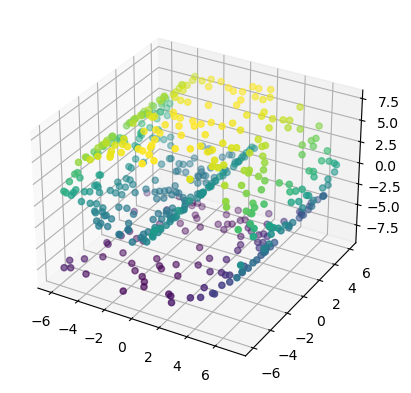

In [2]:
# generate swiss roll dataset
data = generate_swiss_roll(500)

# center the data
X = data - np.mean(data, axis=0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,2], cmap='viridis')

plt.show()

### ISOMAP

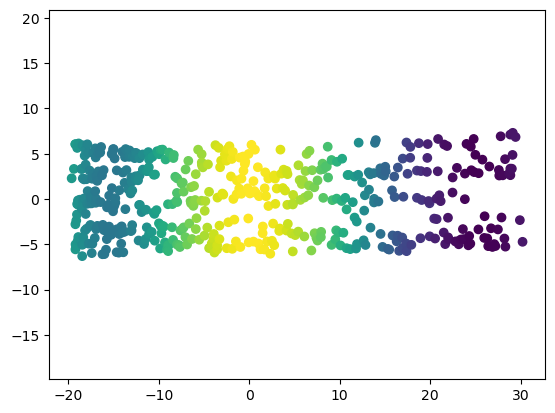

In [4]:
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

isomap = Isomap(n_components=2, n_neighbors=12, path_method='FW', neighbors_algorithm='brute')
isomap.fit(X)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(isomap.embedding_[:, 0], isomap.embedding_[:, 1], c=X[:,2], cmap='viridis')
plt.axis('equal')

plt.show()

### T-SNE

In [47]:
from sklearn.manifold import TSNE
from pca import pca_alg

idx, U = pca_alg(X, 3)
tr_X = np.dot(X, U)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate='auto')
embed = tsne.fit_transform(tr_X)

embed.shape


c:\Users\Erika\AppData\Local\R-MINI~1\envs\deep-learn\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(500, 2)

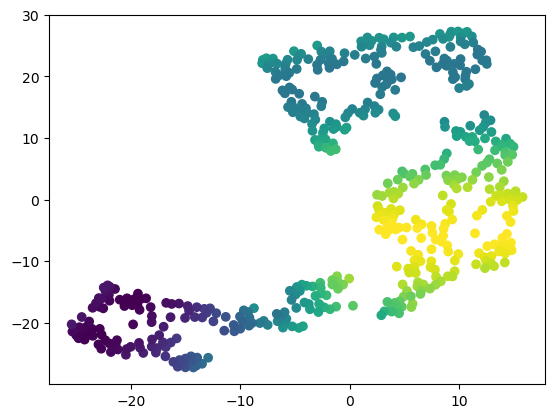

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embed[:, 0], embed[:, 1], c=X[:,2], cmap='viridis')
#plt.axis('equal')

plt.show()

### LLE

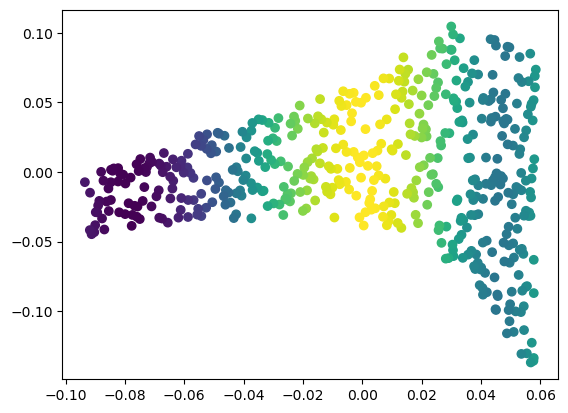

In [61]:
from sklearn import manifold

embed, _ = manifold.locally_linear_embedding(
    X, n_neighbors=12, n_components=2
)

#embed = lle.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embed[:, 0], embed[:, 1], c=X[:,2], cmap='viridis')
#plt.axis('equal')

plt.show()